# Proxyflow demo

For this demo, we consider the simple case of an heterogeneous model without faults described in Appendix A. We aim to compute, for one scenario, the MODFLOW and the graph computations, to visualise them, and to compare them.

In [1]:
### IMPORTS
import sys
sys.path.append('..')
import os
current_path = os.getcwd()
folder = os.path.abspath(os.path.join(current_path, os.pardir))
from classes.graph_simulation import SimWithoutFault
import matplotlib.pyplot as plt
import numpy as np


We are going to instantiate the scenario number 0, for which the multi-gaussian realisations are already in the data folder. 

Parameters to be chosen. If data have already been generated once, the can be set to False.
- generate_MG_realisations : Generates 50 MG realisations for the simulation. Dependancies : gstools
- compute_modflow : Runs Modflow simulation. Dependancies : flopy
- build_graph : Generates graph from the model. Dependancies : igraph, Loopflow

In [2]:
### PARAMETERS
generate_MG_realisations = False #for scenarios different from 0, it has to be set to True
compute_modflow = False #necessary for the first time
build_graph = False #necessary for the first time

In [3]:
sim = SimWithoutFault(data_path=os.path.join(folder,'data','random_sim')) #class of computation
sim.generate_sim_data() #generates data for the simulation, loads the grid.
scenario = sim.instantiate_scenario(scenario_id=0) # a scenario is instantiated by its id (depending on the data) 
if generate_MG_realisations:
    sim.generate_MGS() #generates the MG realisations for all the 50 scenarios
sim.generate_K_field(scenario) #generates the conductivity field for the scenario from the MG realisations
if compute_modflow:
    sim.run_MODFLOW(scenario) #runs the MODFLOW simulation with flopy

In [4]:
sim.load_hydro_data(scenario) #Loads K field and modflow data.
#sim.load_graph(scenario)
sim.get_mass_data(scenario) #transforms MF data

2024-08-06 11:05:29.533375 - LOADING K FIELD
2024-08-06 11:05:29.542350 - LOADING MODFLOW RESULTS


True

In [5]:
### visualising MODFLOW plume
# sim.plot_plume_3D(scenario, visu = 'notebook') 

In [6]:
### Building graph 
if build_graph:
    sim.build_graph(scenario)
sim.load_graph(scenario)

2024-08-06 11:05:29.735909 - LOADING GRAPH


In [7]:
### Computing Dijkstra
distances = sim.compute_dijkstra(scenario)

2024-08-06 11:05:35.617820 - COMPUTING DIJKSTRA WITH IGRAPH
2024-08-06 11:05:36.455643 - DIJKSTRA COMPUTED


Distance distribution is stored in scenario.ig_map. Modflow cumulative mass is in scenario.mf_map.

Text(0.5, 0, 'y')

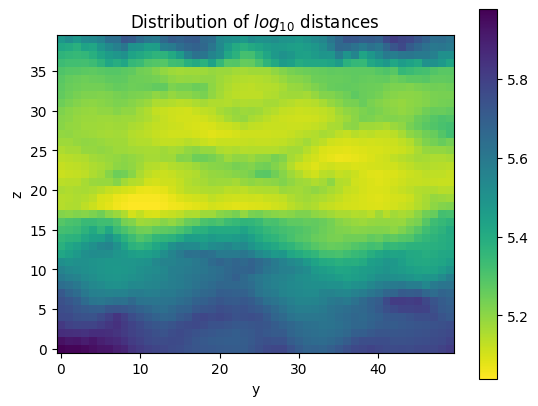

In [12]:
plt.imshow(np.log10(scenario.ig_map), origin='lower',cmap='viridis_r')
plt.colorbar()
plt.title('Distribution of $log_{10}$ distances')
plt.ylabel('z')
plt.xlabel('y')

Text(0.5, 0, 'y')

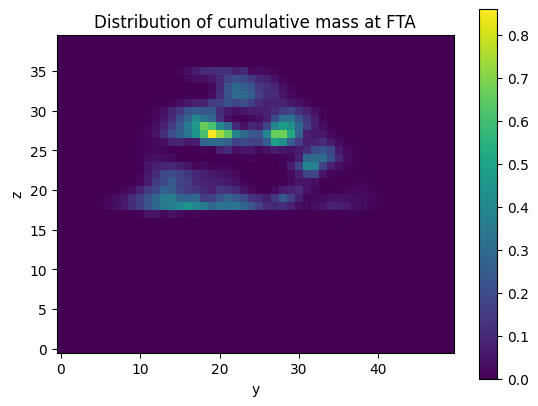

In [9]:
plt.imshow(scenario.mf_map, origin='lower')
plt.colorbar()
plt.title('Distribution of cumulative mass at FTA')
plt.ylabel('z')
plt.xlabel('y')

Correlation coefficients between two distributions.

In [10]:
pearson, spearman = sim.compute_Pearson(scenario), sim.compute_Spearman(scenario)
print(f'Pearson coefficient is {pearson}, Spearman coefficient is {spearman}')

Pearson coefficient is 0.29383343541742213, Spearman coefficient is 0.9280716955179239


Similarity index $\mu(X_m,X_d)$ between the two thresholded arrays is computed:

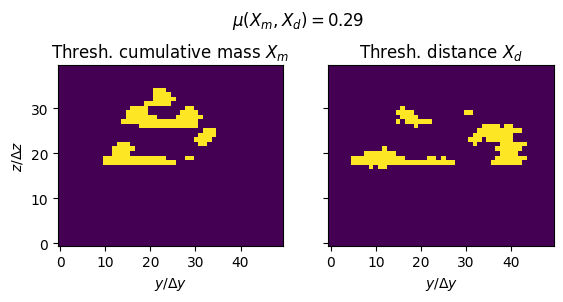

In [11]:
sim.compute_similarity(scenario,plot = True)

An idea of the possible auto-thresholding of the distances. We plot on the left the cumulative mass to give a reference.

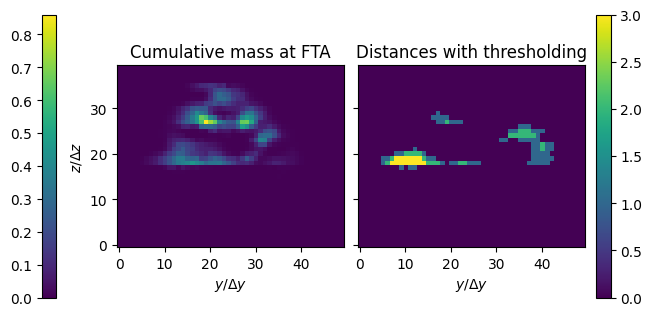

In [12]:
_ = sim.compute_auto_thresh(scenario, plot = True)

Finally, GraphSim.computes_data_dict provides some useful data about the simulation (further description in the code)


In [13]:
sim.main(scenario, compute_data_dict  = True)

2024-07-29 14:13:55.767440 - LOADING K FIELD
2024-07-29 14:13:55.769437 - LOADING MODFLOW RESULTS
2024-07-29 14:13:55.839248 - COMPUTING DIJKSTRA WITH IGRAPH
2024-07-29 14:13:56.356865 - DIJKSTRA COMPUTED


{'id': 0,
 'success': True,
 'conc_max': 0.860075291934133,
 'min_distance': 109399.61397307088,
 't_sim': 518.0833333333335,
 'ctm_x': 1050.0,
 'ctm_y': 2550.0,
 'com_distance': 354.2087627217837,
 'var': 231077.5493712361,
 'jaccard_sim': 0.26666666666666666,
 'wass': 443.8912858845175,
 'NWD': 0.32040073034259015,
 'similarity': 0.2935336985046284,
 'Spearman': 0.9280716955179239,
 'Pearson': 0.29383343541742213}

Method GraphSim.main makes it possible to call several methods at once. Here's an example :

2024-07-29 14:13:56.371826 - LOADING K FIELD
2024-07-29 14:13:56.373822 - LOADING MODFLOW RESULTS
2024-07-29 14:13:56.443667 - COMPUTING DIJKSTRA WITH IGRAPH
2024-07-29 14:13:56.922356 - DIJKSTRA COMPUTED
2024-07-29 14:13:57.668365 - END


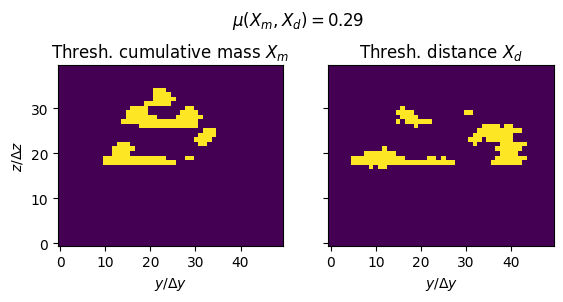

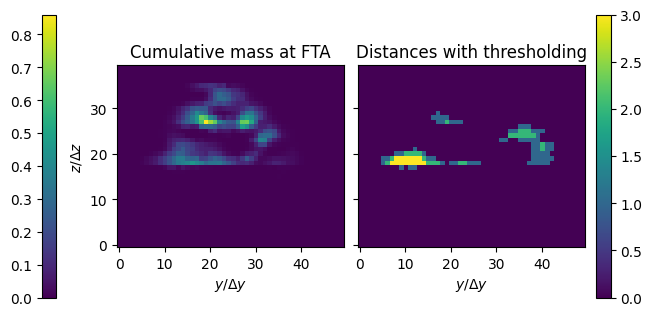

In [14]:
sim.main(scenario, compute_similarity = True, compute_auto_thresh = True, plot = True)

It is possible to call this function in parallel with the method GraphSim.parallel_computation, giving exactly the same kind of arguments

In [15]:
list_scenario_ids = [1,2] #here scenarios 1 and 2 will be instanciated.
sim.scenarios = {}
#result = sim.parallel_computation(list_scenario_ids, generate_K_field = True, run_MODFLOW = True, compute_data_dict = True) 
result = sim.parallel_computation(list_scenario_ids, generate_K_field = True, run_MODFLOW = True, build_graph =True, compute_data_dict = True) 
print(result)

[{'id': 1, 'success': True, 'conc_max': 2.35670834039081, 'min_distance': 83735.65730453223, 't_sim': 426.8333333333334, 'ctm_x': 1050.0, 'ctm_y': 2550.0, 'com_distance': 12.722499902956164, 'var': 16270.889754700405, 'jaccard_sim': 0.5862068965517241, 'wass': 66.96040361418017, 'NWD': 0.842237411905595, 'similarity': 0.7142221542286595, 'Spearman': 0.9333390353347589, 'Pearson': 0.1688543760765845}, {'id': 2, 'success': True, 'conc_max': 1.1670926948483307, 'min_distance': 124970.22035096484, 't_sim': 487.6666666666668, 'ctm_x': 1050.0, 'ctm_y': 2550.0, 'com_distance': 107.56371934897523, 'var': 47854.54462148244, 'jaccard_sim': 0.2619047619047619, 'wass': 223.4485293820903, 'NWD': 0.5638624460944217, 'similarity': 0.4128836039995918, 'Spearman': 0.9198088339522084, 'Pearson': 0.2258550385681783}]
